In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [5]:
x_train.shape

(25000, 100)

In [6]:
y_test.shape

(25000,)

In [7]:
y_train.shape

(25000,)

In [8]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
y_test_one_hot.shape

(25000, 2)

In [11]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [12]:
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Lambda
from tensorflow.keras.models import Model

In [13]:
main_input = Input(shape=(max_len,), dtype='int32')
x = Embedding(output_dim=64, input_dim=max_features, input_length=max_len)(main_input)
RNN_out = SimpleRNN(32, return_sequences=True)(x) # This will return 100x32 for a document
out = Lambda(lambda x: tf.math.reduce_mean(x, axis=1))(RNN_out) # 평균을 구함 => 하나의 문서에 대해서 32 차원 벡터 출력
main_output = Dense(2, activation='softmax')(out)
model = Model(inputs=main_input,outputs=main_output)


In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 32)           3104      
                                                                 
 lambda (Lambda)             (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 643,170
Trainable params: 643,170
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpoint_filepath = './temp/checkpoint_en_mean'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [17]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics='accuracy')

In [18]:
history = model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
157/157 [==============================] - 5s 28ms/step - loss: 0.5302 - accuracy: 0.7475 - val_loss: 0.4665 - val_accuracy: 0.7820
Epoch 2/20
157/157 [==============================] - 5s 29ms/step - loss: 0.3624 - accuracy: 0.8530 - val_loss: 0.4190 - val_accuracy: 0.8130
Epoch 3/20
157/157 [==============================] - 5s 29ms/step - loss: 0.2974 - accuracy: 0.8827 - val_loss: 0.4305 - val_accuracy: 0.8122
Epoch 4/20
157/157 [==============================] - 4s 27ms/step - loss: 0.2617 - accuracy: 0.8986 - val_loss: 0.3859 - val_accuracy: 0.8298
Epoch 5/20
157/157 [==============================] - 5s 30ms/step - loss: 0.2332 - accuracy: 0.9104 - val_loss: 0.3761 - val_accuracy: 0.8320
Epoch 6/20
157/157 [==============================] - 5s 29ms/step - loss: 0.2112 - accuracy: 0.9218 - val_loss: 0.4105 - val_accuracy: 0.8122
Epoch 7/20
157/157 [==============================] - 5s 29ms/step - loss: 0.1955 - accuracy: 0.9287 - val_loss: 0.4245 - val_accuracy: 0.8172

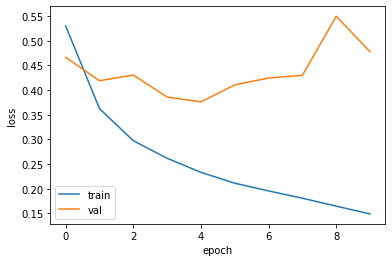

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

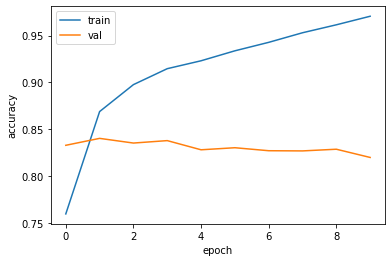

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [20]:
model.load_weights(checkpoint_filepath)

In [21]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 3s 3ms/step - loss: 0.3911 - accuracy: 0.8228


In [22]:
print('test_acc:', test_acc)

test_acc: 0.8228399753570557
